## Управление потоком жидкости

#### Создание лингвистических переменных

Входные X: speed (текущая скорость) и target (желаемая скорость) /
Выходные Y: cadence (необходимый каденс)

In [24]:
import numpy as np
from skfuzzy import control as ctrl

speed = ctrl.Antecedent(np.arange(0, 100, 1), "speed")
target = ctrl.Antecedent(np.arange(0, 100, 1), "target")
cadence = ctrl.Consequent(np.arange(0, 130, 1), "cadence")

#### Формирование нечетких переменных для лингвистических переменных и их визуализация

d:\Методы искусственного интеллекта\MII_Salin_Oleg_PIbd-33\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


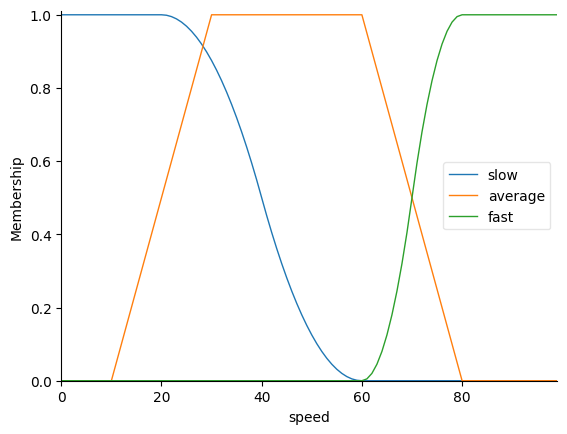

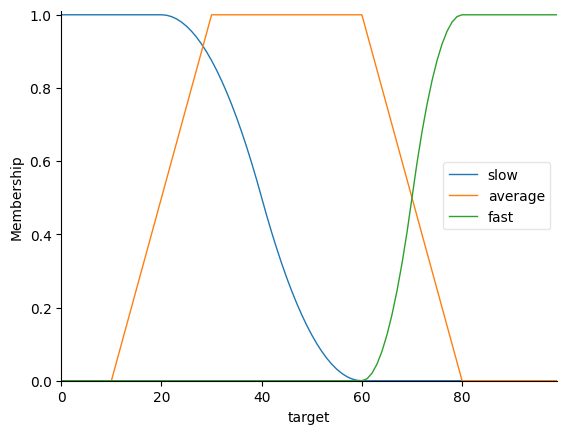

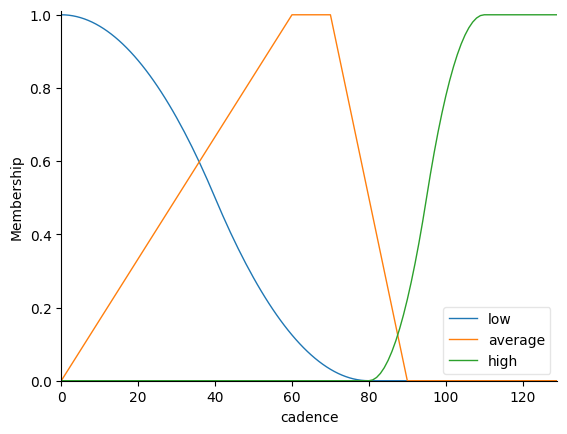

In [25]:
import skfuzzy as fuzz

speed["slow"] = fuzz.zmf(speed.universe, 20, 60)
speed["average"] = fuzz.trapmf(speed.universe, [10, 30, 60, 80])
speed["fast"] = fuzz.smf(speed.universe, 60, 80)
speed.view()

target["slow"] = fuzz.zmf(target.universe, 20, 60)
target["average"] = fuzz.trapmf(target.universe, [10, 30, 60, 80])
target["fast"] = fuzz.smf(target.universe, 60, 80)
target.view()

cadence["low"] = fuzz.zmf(cadence.universe, 0, 80)
cadence["average"] = fuzz.trapmf(cadence.universe, [0, 60, 70, 90])
cadence["high"] = fuzz.smf(cadence.universe, 80, 110)
cadence.view()

#### Формирование и визуализация базы нечетких правил

В случае ошибки необходимо в файле
```
.venv/lib/python3.13/site-packages/skfuzzy/control/visualization.py
```
удалить лишний отступ на 182 строке, должно быть:
```python
        if not matplotlib_present:
            raise ImportError("`ControlSystemVisualizer` can only be used "
                              "with `matplotlib` present in the system.")

        self.ctrl = control_system

        self.fig, self.ax = plt.subplots()
```

(<Figure size 640x480 with 1 Axes>, <Axes: >)

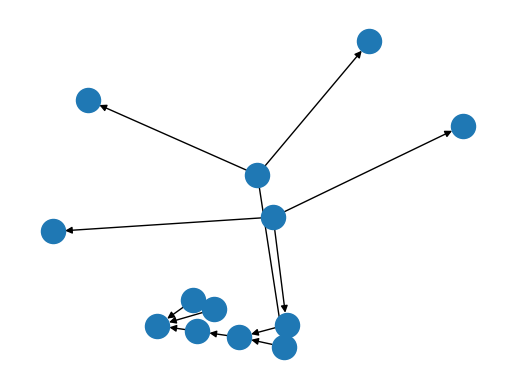

In [26]:
rule1 = ctrl.Rule(speed["slow"] & target["fast"], cadence["high"])
rule2 = ctrl.Rule(speed["slow"] & target["average"], cadence["high"])
rule3 = ctrl.Rule(speed["slow"] & target["slow"], cadence["low"])
rule4 = ctrl.Rule(speed["average"] & target["fast"], cadence["high"])
rule5 = ctrl.Rule(speed["average"] & target["average"], cadence["average"])
rule6 = ctrl.Rule(speed["average"] & target["slow"], cadence["low"])
rule7 = ctrl.Rule(speed["fast"] & target["fast"], cadence["high"])
rule8 = ctrl.Rule(speed["fast"] & target["average"], cadence["low"])
rule9 = ctrl.Rule(speed["fast"] & target["slow"], cadence["low"])

rule1.view()

#### Создание нечеткой системы и добавление нечетких правил в базу знаний нечеткой системы

In [27]:
cadence_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

cadences = ctrl.ControlSystemSimulation(cadence_ctrl)

#### Пример расчета выходной переменной influx на основе входных переменных level и flow

Система также формирует подробный журнал выполнения процесса нечеткого логического вывода

In [28]:
cadences.input["speed"] = 60
cadences.input["target"] = 20
cadences.compute()
cadences.print_state()
cadences.output["cadence"]

 Antecedents 
Antecedent: speed                   = 60
  - slow                            : 0.0
  - average                         : 1.0
  - fast                            : 0.0
Antecedent: target                  = 20
  - slow                            : 1.0
  - average                         : 0.5
  - fast                            : 0.0

 Rules 
RULE #0:
  IF speed[slow] AND target[fast] THEN cadence[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - speed[slow]                                            : 0.0
  - target[fast]                                           : 0.0
                              speed[slow] AND target[fast] = 0.0
  Activation (THEN-clause):
                                             cadence[high] : 0.0

RULE #1:
  IF speed[slow] AND target[average] THEN cadence[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - speed[slow]                        

np.float64(35.97074517705886)

#### Визуализация функции принадлежности для выходной переменной influx

Функция получена в процессе аккумуляции и используется для дефаззификации значения выходной переменной influx

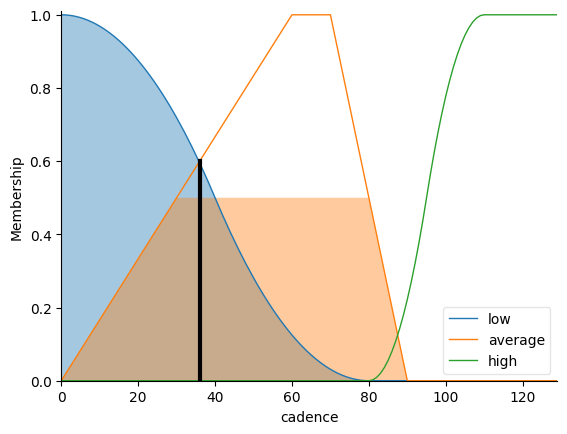

In [29]:
cadence.view(sim=cadences)

## Пример решения задачи регрессии на основе нечеткого логического вывода

#### Загрузка данных

In [43]:
import pandas as pd
from utils import split_stratified_into_train_val_test

df = pd.read_csv("data/car_price_prediction.csv")
df = df.drop(["ID", "Manufacturer", "Model",  "Leatherinterior", "Fueltype", "Cylinders",
          "Doors", "Wheel", "Color", "Levy", "Drive wheels", "Airbags", "Gear box type", "Mileage"], axis=1)
df = df.dropna()
df["Engine volume"] = df["Engine volume"].apply(
    lambda x: float(x.split()[0])
)


cars_train, X_val, cars_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df,
    stratify_colname="Category",
    target_colname="Price",
    frac_train=0.80,
    frac_val=0,
    frac_test=0.20
)

cars_train = cars_train.drop("Category", axis=1)
cars_test = cars_test.drop("Category", axis=1)
display("cars_train", cars_train)
display("cars_test", cars_test)

'cars_train'

Price  Prodyear  Engine volume
17944  14426      2010            1.8
10224   1568      2011            2.4
15926   3136      2012            3.5
559    10976      1995            2.5
15725  21169      2012            1.6
...      ...       ...            ...
574    10663      2011            1.3
8337      45      2007            1.3
14664  34497      2011            3.0
12408  43905      2010            3.5
10796  12858      2013            1.6

[15389 rows x 3 columns]

'cars_test'

Price  Prodyear  Engine volume
9398    3293      2010            1.8
7548    8154      2008            3.3
3040   25089      2013            1.8
3395   17346      2012            1.6
6379   65052      2018            2.0
...      ...       ...            ...
5180    7056      2010            2.0
9497   28225      2011            2.0
13141  11917      2003            2.4
17474  28225      2013            1.8
2493    3136      1998            2.8

[3848 rows x 3 columns]

#### Инициализация лингвистических переменных и автоматическое формирование нечетких переменных

26307500


d:\Методы искусственного интеллекта\MII_Salin_Oleg_PIbd-33\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


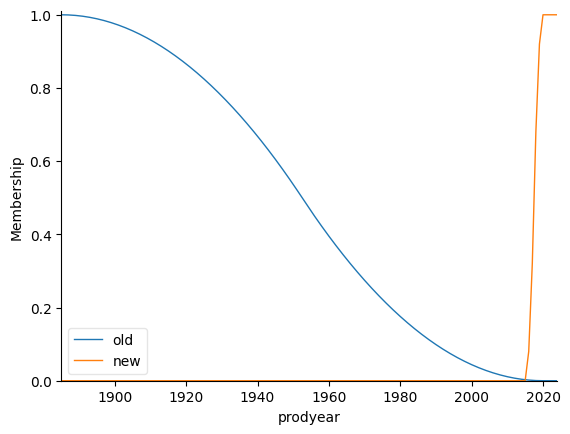

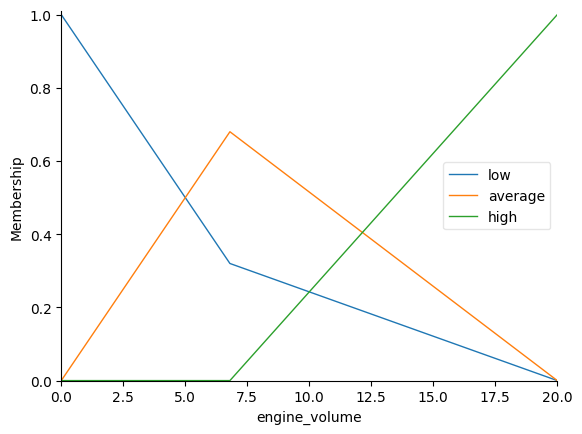

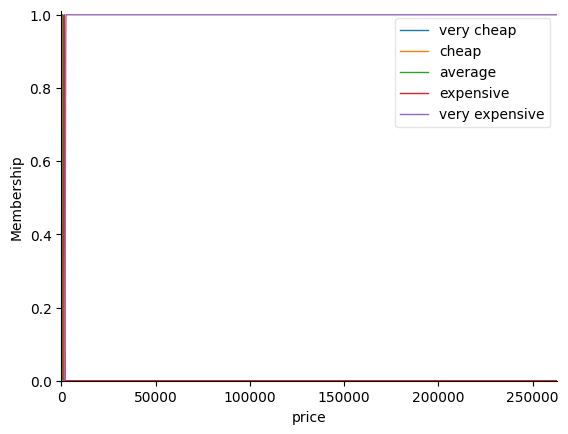

In [31]:
prodyear = ctrl.Antecedent(np.arange(1885, 2025, 1), "prodyear")
engine_volume = ctrl.Antecedent(cars_train["Engine volume"].sort_values().unique(), "engine_volume")
print(cars_train["Price"].max())
price = ctrl.Consequent(np.arange(cars_train["Price"].min() // 100, 
                                  cars_train["Price"].max() // 100, 1), "price")

prodyear["old"] = fuzz.zmf(prodyear.universe, 1885, 2020)
prodyear["new"] = fuzz.smf(prodyear.universe, 2015, 2020)
prodyear.view()
engine_volume.automf(3, variable_type="quant")
engine_volume.view()
price["very cheap"] = fuzz.trimf(price.universe, [0, 50, 100])
price["cheap"] = fuzz.trimf(price.universe, [80, 120, 200])
price["average"] = fuzz.trapmf(price.universe, [150, 250, 500, 1000])
price["expensive"] = fuzz.trimf(price.universe, [800, 1500, 2000])
price["very expensive"] = fuzz.smf(price.universe, 1800, 2500)
price.view()

#### Нечеткие правила

In [32]:
rule11 = ctrl.Rule(
    engine_volume["low"] & prodyear["old"],
    price["very cheap"],
)
rule12 = ctrl.Rule(
    engine_volume["average"] & prodyear["old"],
    price["cheap"],
)
rule13 = ctrl.Rule(
    engine_volume["high"] & prodyear["old"],
    price["average"],
)
rule21 = ctrl.Rule(
    engine_volume["low"] & prodyear["new"],
    price["average"],
)
rule22 = ctrl.Rule(
    engine_volume["average"] & prodyear["new"],
    price["expensive"],
)
rule23 = ctrl.Rule(
    engine_volume["high"] & prodyear["new"],
    price["very expensive"],
)

#### Создание нечеткой системы

In [33]:
fuzzy_rules = [
    rule11,
    rule12,
    rule13,
    rule21,
    rule22, 
    rule23,
]

price_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(price_cntrl)

fuzzy_rules

[IF engine_volume[low] AND prodyear[old] THEN price[very cheap]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF engine_volume[average] AND prodyear[old] THEN price[cheap]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF engine_volume[high] AND prodyear[old] THEN price[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF engine_volume[low] AND prodyear[new] THEN price[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF engine_volume[average] AND prodyear[new] THEN price[expensive]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF engine_volume[high] AND prodyear[new] THEN price[very expensive]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax]

#### Пример использования полученной нечеткой системы

In [34]:
sim.input["prodyear"] = 2016
sim.input["engine_volume"] = 1.5
sim.compute()
sim.print_state()
display(sim.output["price"])

 Antecedents 
Antecedent: engine_volume           = 1.5
  - low                             : 0.85
  - average                         : 0.15
  - high                            : 0.0
Antecedent: prodyear                = 2016
  - old                             : 0.0017558299039780523
  - new                             : 0.08000000000000002

 Rules 
RULE #0:
  IF engine_volume[low] AND prodyear[old] THEN price[very cheap]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - engine_volume[low]                                     : 0.85
  - prodyear[old]                                          : 0.0017558299039780523
                      engine_volume[low] AND prodyear[old] = 0.0017558299039780523
  Activation (THEN-clause):
                                         price[very cheap] : 0.0017558299039780523

RULE #1:
  IF engine_volume[average] AND prodyear[old] THEN price[cheap]
	AND aggregation function : fmin
	OR aggregation function  : 

np.float64(1065.2447541258305)

#### Функция для автоматизации вычисления целевой переменной Y на основе вектора признаков X

In [35]:
def fuzzy_pred(row):
    sim.input["prodyear"] = row["Prodyear"]
    sim.input["engine_volume"] = row["Engine volume"]
    sim.compute()
    return sim.output["price"]

#### Тестирование нечеткой системы на обучающей выборке

In [36]:
result_train = cars_train.copy()

result_train["PricePred"] = result_train.apply(fuzzy_pred, axis=1)

result_train.head(15)

Price  Prodyear  Engine volume    PricePred
14122  35124      2019            5.7  1083.035198
5666   26657      2011            1.8    99.933398
13023   4200      2001            1.6    99.704172
1838   15530      2016            2.0  1065.244754
3112   32302      2013            2.5    99.959694
9204    5959      2015            2.5    99.979430
3100   22580      2017            2.0   954.577176
12754   9408      2012            3.0    99.947365
14803   6586      2018            2.5   848.532066
4756    6586      1999            2.0    99.638970
9505   20385      2012            2.5    99.947365
17586  40769      2008            3.0    99.881685
13728   8154      2003            1.5    99.762966
944    10036      2002            2.0    99.734373
18262    251      2019            2.5   831.412760

#### Тестирование нечеткой системы на тестовой выборке

In [48]:
result_test = cars_test.copy()

result_test["PricePred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["PricePred"] = result_test["PricePred"].apply(lambda x: x * 100)

display(result_test)


Price  Prodyear  Engine volume     PricePred
9398    3293      2010            1.8   9991.779367
7548    8154      2008            3.3   9988.168542
3040   25089      2013            1.8   9995.969432
3395   17346      2012            1.6   9994.736527
6379   65052      2018            2.0  80674.546145
...      ...       ...            ...           ...
5180    7056      2010            2.0   9991.779367
9497   28225      2011            2.0   9993.339772
13141  11917      2003            2.4   9976.296566
17474  28225      2013            1.8   9995.969432
2493    3136      1998            2.8   9960.397848

[3848 rows x 4 columns]

#### Оценка результатов на основе метрик для задачи регрессии

In [49]:
import math
from sklearn import metrics


rmetrics = {}

rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_test["Price"], result_test["PricePred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Price"], result_test["PricePred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Price"], result_test["PricePred"])
)
rmetrics["R2_test"] = metrics.r2_score(
    result_test["Price"], result_test["PricePred"]
)

rmetrics

{'RMSE_train': 36049.32401271262,
 'RMSE_test': 36049.32401271262,
 'RMAE_test': 142.4884853198348,
 'R2_test': -1.5218160662039941}